# Geodesic Demo using Coordinate Time

First, we import the necessary modules.

In [1]:
%load_ext autoreload
%autoreload 2

from jax.config import config
config.update("jax_enable_x64", True)

from fadge import GRRT
from jax   import numpy as np

from matplotlib import pyplot as plt
from itertools  import product

We then instasize `PRay` into an object

In [2]:
grrt = GRRT(
    aspin=0.9, ind='time',
    eps=-1e-3, atol=1e-6, rtol=0, hmin=0,
    names={'ind':'t'},
    dtype=np.float64,
)

grrt._ic = np.array([
    [0.00000000e+00, 1.00000000e+02, 0.00000000e+00, 6.12323400e-15],
    [1.00000000e+00, 9.60784314e-01, 0.00000000e+00, 5.88310717e-17],
])

grrt.kwargs = {'L':-1000, 'h':0.75*100, 'N':100000, **grrt.kwargs}

Radius of outer event horizon: 1.4358898943540672


To setup the initial conditions, we first set the camera location, and then specify the image.

To performm geodesic integration, simply call `pray.geode()`.
When no argument is specified, the integration is carried out to `-2 * r_obs`.
The return values are the full steps during the integration.

In [3]:
l, f = grrt.geode() # full step output

ft = f[:,0,0]
fx = f[:,0,1]
fy = f[:,0,2]
fz = f[:,0,3]

jit(masked_do); input: Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)> Traced<ShapedArray(float64[])>with<DynamicJaxprTrace(level=0/1)> [Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)>, Traced<ShapedArray(float64[2,4])>with<DynamicJaxprTrace(level=0/1)>]


100%|██████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 88.62it/s, t=-1.00e+03, dt=-0.500   ]


target = -1000 exceeded; SKIP


Because `PRay` uses `XAJ` for solving ODEs, it supports dense output.
We can put a lot of sampling points near the black hole for better visualization of the geodeiscs.

We are finally ready to plot the results.

Text(0, 0.5, 'y')

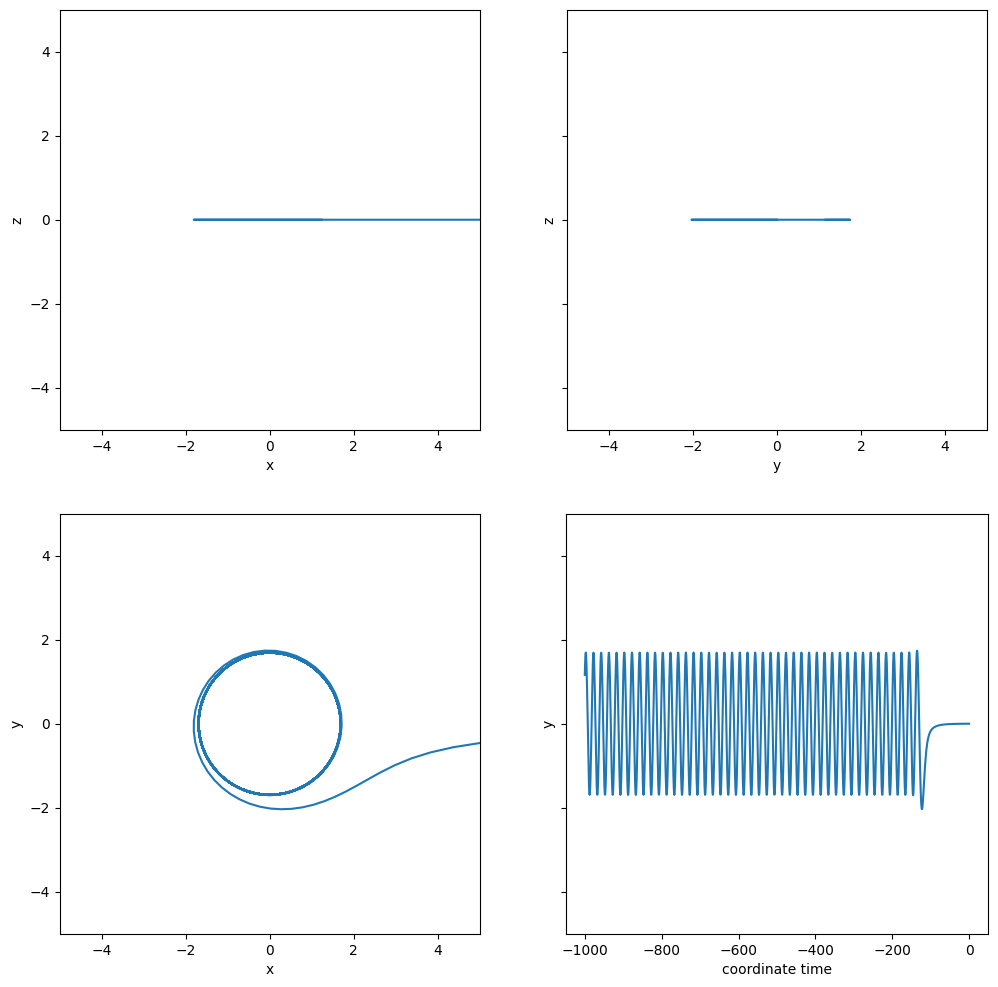

In [4]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharey=True)

lim = 5

axes[0][0].plot(fx, fz)
axes[0][1].plot(fy, fz)
axes[1][0].plot(fx, fy)
axes[1][1].plot(ft, fy)

#fig.tight_layout()

ax = axes[0][0]
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_aspect('equal')

ax = axes[0][1]
ax.set_xlabel('y')
ax.set_ylabel('z')
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_aspect('equal')

ax = axes[1][0]
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
ax.set_aspect('equal')

ax = axes[1][1]
ax.set_xlabel('coordinate time')
ax.set_ylabel('y')

Text(0, 0.5, 'y')

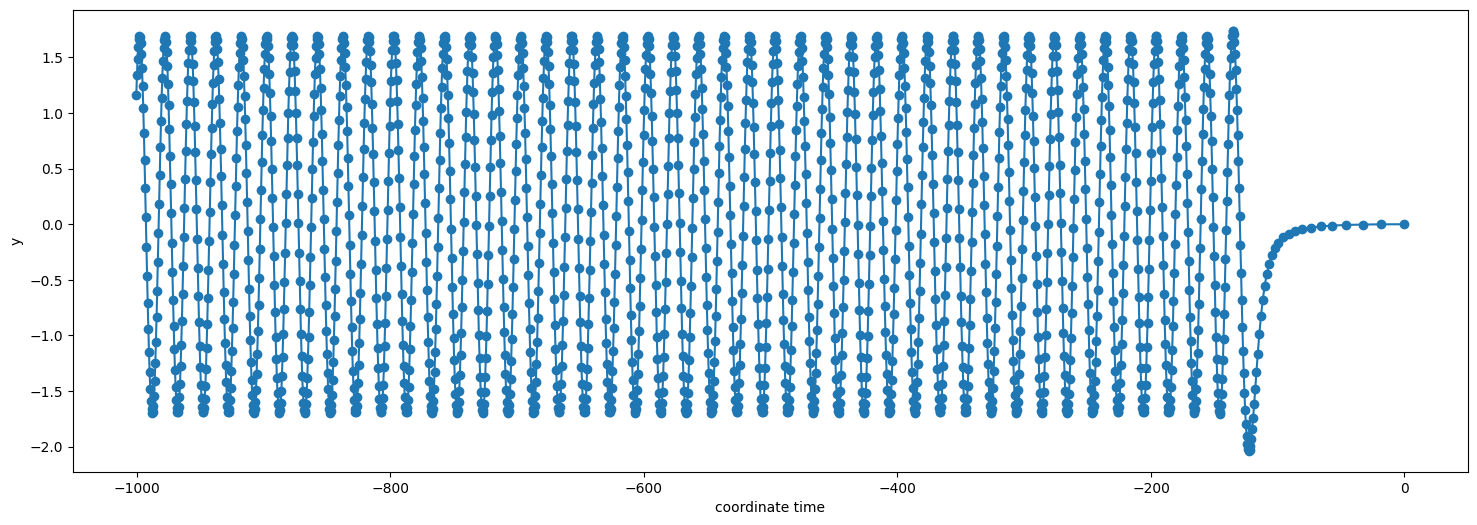

In [5]:
fig, ax = plt.subplots(1,1, figsize=(18,6))
ax.plot(ft, fy)
ax.scatter(ft, fy)
ax.set_xlabel('coordinate time')
ax.set_ylabel('y')

Text(0, 0.5, 'coordinate time')

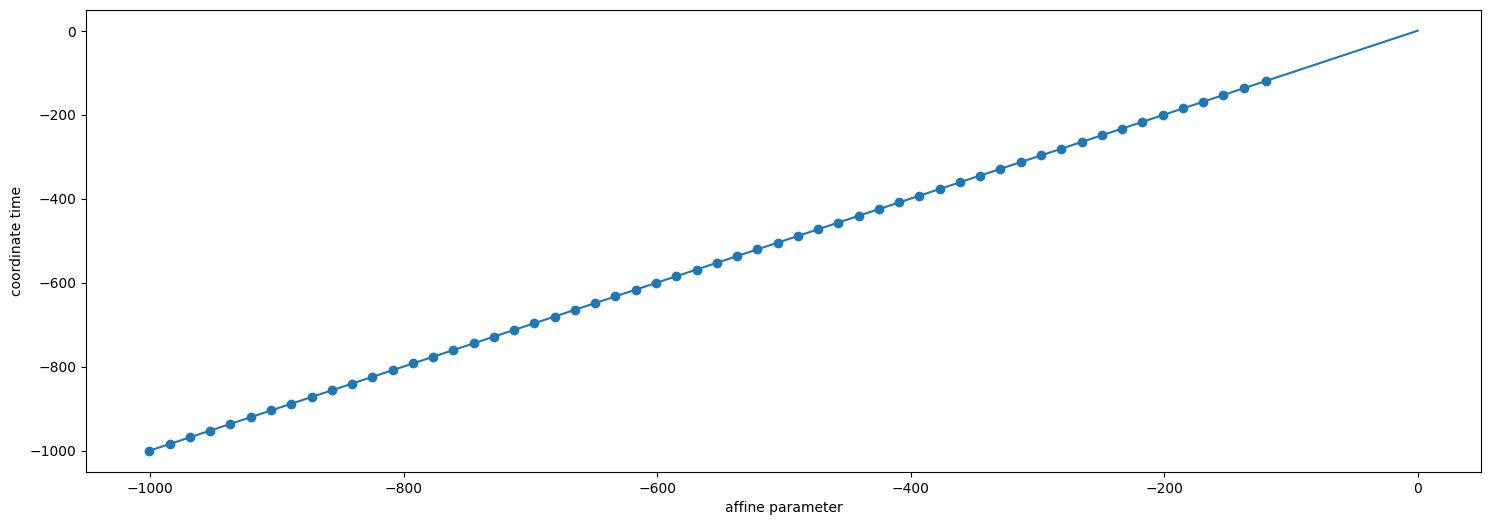

In [6]:
fig, ax = plt.subplots(1,1, figsize=(18,6))
ax.plot(l, ft)
ax.scatter(l[::32], ft[::32])
ax.set_xlabel('affine parameter')
ax.set_ylabel('coordinate time')

Text(0, 0.5, '|coordinate time|')

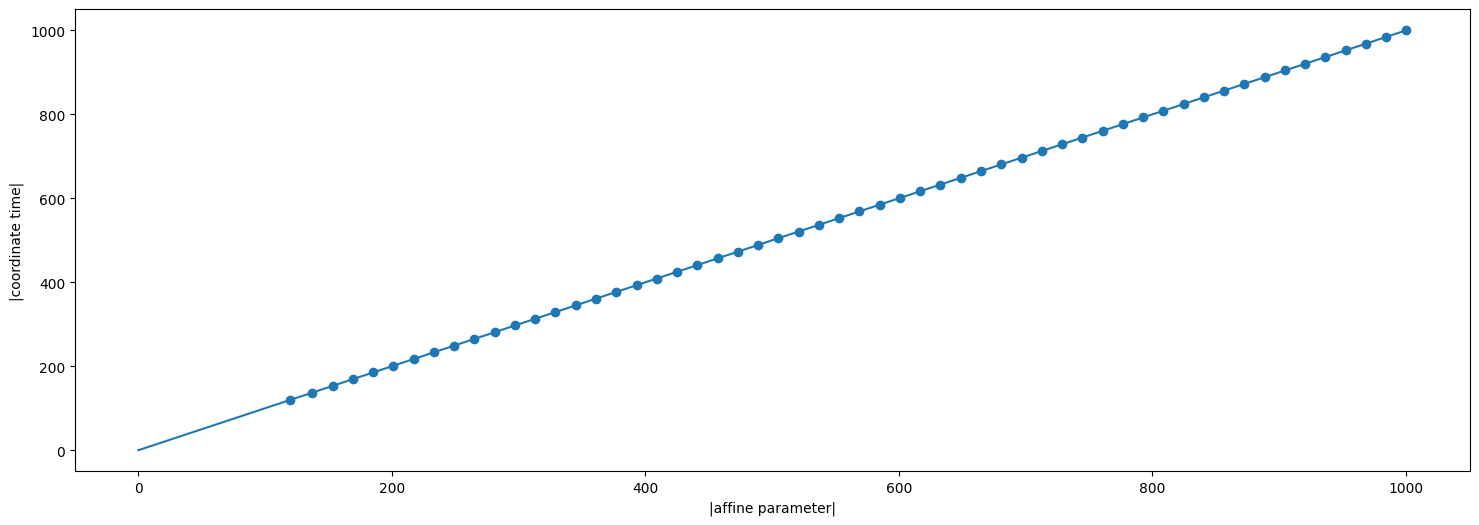

In [7]:
fig, ax = plt.subplots(1,1, figsize=(18,6))
ax.plot(abs(l), abs(ft))
ax.scatter(abs(l[::32]), abs(ft[::32]))
ax.set_xlabel('|affine parameter|')
ax.set_ylabel('|coordinate time|')